# Case study 1: melodic arch

In [1]:
import glob
import numpy as np
import scipy.interpolate
import matplotlib.pyplot as plt

import chant21
from music21 import converter # Note: not tested with 6.1 yet!

## 1. GregoBaseCorpus

In [2]:
# All gabc files in the gregobasecorpus
GB = 'data/gregobasecorpus-v0.4'
filenames = sorted(glob.glob(f'{GB}/gabc/*.gabc'))

In [3]:
ch = converter.parse(filenames[1])
ch.show('html', showOptions=True)

conversion,"{'originalFormat': 'gabc', 'converter': 'chant21', 'version': '0.4.6'}"
name,Deus misereatur
office-part,in
mode,3
transcriber,Andrew Hinkley
gabc-copyright,CC0-1.0 <http://creativecommons.org/publicdomain/zero/1.0/>
_gregobase_corpus_version,0.4
_gregobase_id,2
_gregobase_url,https://gregobase.selapa.net/chant.php?id=2
_gregobase_sources,2
_gregobase_source_0_id,2


You can retrieve the phrases in a chant using `chant.phrases`. All notes between two pausae are grouped in a stream:

<music21.stream.Stream 0x120c83cd0>


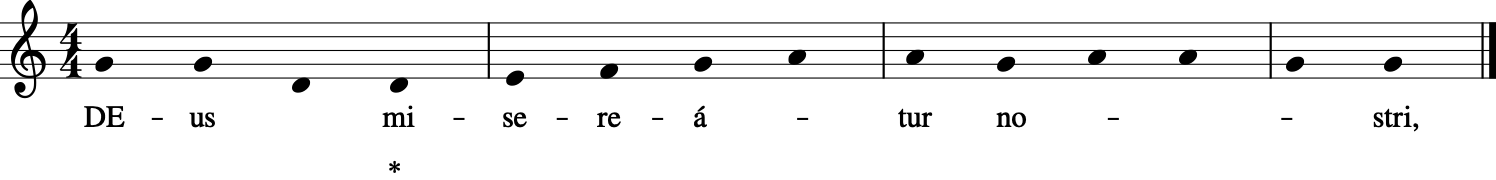

In [4]:
print(ch.phrases[0])
ch.phrases[0].show()

## 2. Convert phrases to contours

Next we turn phrases into vectors of 50 equidistant pitches, as described in the paper.

In [5]:
def phrase_to_contour(phrase, num_samples=50, normalize=True):
    pitches = [n.pitch.ps for n in phrase.flat.notes]
    # repeat the final note, so it has a duration
    pitches.append(pitches[-1])
    
    positions = np.linspace(0, 1, len(pitches))
    func = scipy.interpolate.interp1d(positions, pitches, kind='previous')
    contour = func(np.linspace(0, 1, num_samples))
    
    # Normalize pitch to mean 0
    if normalize: contour = contour - contour.mean()
    return contour

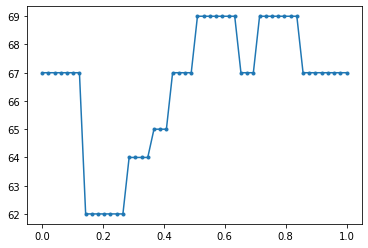

In [6]:
xs = np.linspace(0, 1, 50)
ys = phrase_to_contour(ch.phrases[0], normalize=False)
plt.plot(xs, ys, '.-')

## 3. Extract all contours

In [7]:
def extract_contours(filenames):
    contours = []
    for filename in filenames:
        ch = converter.parse(filename)
        for phrase in ch.phrases:
            contour = phrase_to_contour(phrase)
            contours.append(contour)
    return np.asarray(contours)

In [8]:
contours = extract_contours(filenames[:20])
contours

array([[-2.16, -2.16, -2.16, ...,  2.84,  2.84,  2.84],
       [ 4.  ,  4.  ,  4.  , ..., -5.  , -5.  , -5.  ],
       [-0.56, -0.56, -0.56, ..., -2.56, -2.56, -2.56],
       ...,
       [ 1.62,  1.62,  1.62, ..., -3.38, -3.38, -3.38],
       [-2.48, -2.48, -2.48, ...,  2.52,  2.52,  2.52],
       [ 1.8 ,  1.8 ,  1.8 , ..., -3.2 , -3.2 , -3.2 ]])

## 4. Plot the contours

Text(0, 0.5, 'normalized pitch')

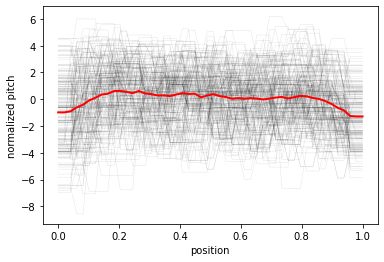

In [9]:
xs = np.linspace(0, 1, 50)
plt.plot(xs, contours.T, 'k-', alpha=.1, lw=.5);
plt.plot(xs, contours.mean(axis=0), 'r', lw=2)
plt.xlabel('position')
plt.ylabel('normalized pitch')